# Lineare Regression

Die Schüler:innen können
* eine lineare Regression im Zusammenhang mit dem Tierdatensatz anwenden.
* eine lineare Regression benutzen um Zusammenhänge zu quantifizieren.

## Einstieg in die lineare Regression

Gegeben sind zwei Streudiagramme aus dem Tierdatensatz.

Streudiagramm 1 (siehe unten):
* Erklärende Variable: "Alter"
* Erklärte Variable: "Wochen"

Streudiagramm 2 (siehe unten):
* Erklärende Variable "Gewicht"
* Erklärte Variable: "Wochen"

In [4]:
import pandas as pd 
from charts import histogram
datei_name = "animal_dataset_bc.csv"
animal_table = pd.read_csv(datei_name,
                        header=0,
                        names=["Name", "Spezies", "Geschlecht", "Alter", "Steril", "Beine", "Gewicht", "Wochen"], 
                        index_col=0)

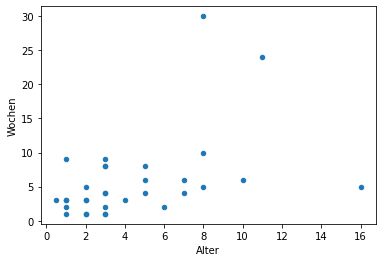

In [5]:
#Streudiagramm 1:
from charts import scatter_plot
scatter_plot(animal_table, "Alter", "Wochen")

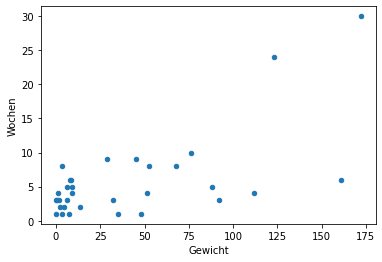

In [6]:
#Streudiagramm 2:
scatter_plot(animal_table, "Gewicht", "Wochen")

**Einzelarbeit:** Kann die Zeit bis zur Adoptzion anhand des Alters vorausgesagt werden? Kann sie anhand des Gewichts vorausgesat werden? Welche Vorhersage ist "besser"?

#Hier kommt Ihre Antwort hin.

In [7]:
#Teil einer Lösung
from charts import r_value

print(r_value(animal_table, "Alter", "Wochen"))
print(r_value(animal_table, "Gewicht", "Wochen"))

# Das Gewicht scheint die Wochen bis zur Adoption besser vorauszusagen, 
# zumindest die Stärke das linearen Zusammenhangs (der Korrelationskoeffizient r) ist grösser.

0.447823193601039
0.648176449402253


Die Frage ist also, ob aufgrund des Gewichts eines Tieres die Zeit bis zur Adoption vorausgesagt werden kann. Das Streudiagramm scheint nahe zu legen, dass leichtere Tiere schnelle adoptiert werden und schwerere Tiere langsamer. Dies ist alles aber sehr unpräzise. Wäre es möglich eine exaktere Vorhersage zu machen?

Benötigt würde eine Gerade, welche die Punkte des Streudiagramms bestmöglich beschreibt, also eine Gerade, welche im Zentrum der Punktewolche ist. 
Jeder Punkt zieht an dieser Gerade, Punkte oberhalb der Gerade ziehen diese nach oben, Punkte unterhalb der Linie ziehen sie nach unten. Je weiter ein Punkt entfernt ist, deso mehr zieht er. Eine solche Gerade wird **Regressionsgerade** genennt. Diese Gerade kann als Graph einer linearen Funktion aufgefasst werden, ein **linearer Prädiktor**.

Sind $x$-Werte bekannt, so kann mit Hilfe dieser linearen Funktion ein dazugehörender $y$-Wert vorausgesagt werden.

Was aber ist die beste solche Gerade? Mit Hilfe der Mathematik kann eine Gerade bestimmt werden, die bestmöglich zu den Punkten passt. Die statistische Methode eine lineare Beziehung in einem Datensatz zu bestimmen wird **lineare Regression** genannt. Die lineare Regression ist die Mathematik, welche zu einer bestmöglich passenden Gerade in einem Datensatz führt.

**Einzelarbeit:** Betrachten Sie das folgende Geogebra-File: https://www.geogebra.org/m/ZcVIxKtF.

1. Bewegen Sie den blauen Punkt $P$ mit dem Mauscursor. Beachten Sie, wie sich der Korrelationskoeffizient $r$ und die Gleichung der Refressionsgerade verändert.

2. Welches ist der grösste $r$-Wert, den Sie mit einer geschickten Verschiebung vom Punkt $P$ erreichen?

*Ohne Lösung*

3. Können Sie den Punkt $P$ so verschieben, dass $r$ negativ wird? Wenn ja, wie gross ist $r$?

*Ja, ist möglich, z.B. wenn $P(29|0)$ gewählt wird.*

4. Wohin könnnen Sie den Punkt $P$ schieben, damit er am besten zu den anderen Punkten passt? Was passiert mit $r$ und der Geradengleichung?

*$P$ muss so verschoben werden, dass er möglichst auf der Geraden liegt und die Gerade möglichst nah bei den anderen Punkten vorbei geht. $r$ nähert sich dann dem Wert 1 an.*

5. Wohin könnnen Sie den Punkt $P$ schieben, damit er am schlechtesten zu den anderen Punkten passt? Was passiert mit $r$ und der Geradengleichung?

Wird ein Punkt in der Nähe von $(0|13)$ gewählt wird $r$ null.

6. Kann die Regressionsgerade ganz über oder unter den Punkten liegen? Warum oder warum nicht?

*Nein, kann sie nicht. Sonst gäbe es eine besser passende Gerade weiter unten oder weiter oben (innerhalb der Punktewolke).*

7. Kann es sein, dass mehr Punkte über der Geraden als unter der Geraden liegen?

*Ja, das kann sein. Da Punkte, welche weit von der Geraden entfernt liegen, mehr an dieser "zerren" kann es z.B. sein, dass auf einer Seite zwar weniger Punkte liegen, diese aber weiter von der Geraden entfernt sind.*

**Einzelarbeit**: Betrachten Sie die folgenden Streudiagramme. Was können Sie über die Regressionsgerade aussagen?
Steigt diese oder fällt sie? Wie stark ist der Zusammenhang zwischen den beiden Variablen? Wie gross ist ungefähr der Korrelationskoeffizient $r$?

1. Streudiagramm A.

<img src="../Images/11_SP_A.png" width=300>

In [8]:
from fragen import *

frage11A()

2. Streudiagramm B.

<img src="../Images/11_SP_B.png" width=300>

In [9]:
frage11B()

3. Streudiagramm C.

<img src="../Images/11_SP_B.png" width=300>

In [10]:
frage11C()

4. Streudiagramm D.

<img src="../Images/11_SP_D.png" width=300>

In [11]:
frage11D()

## Lineare Regression mit Python

Mit der Funktion lr_plot kann eine Darstellung erstellt werden, welche folgendes enthält:
1. ein Streudiagramm
2. die Regressiongerade
3. die Funktionsgleichung der Regressionsgeraden
4. den Korrelationskoeffizienten $r$

Die Funktion lr_plot erhält als Argumente eine Tabelle und zwei Spaltennamen. Der Namen der ersten Spalte wird als $x$-Koordinate verwendet (erklärende Variable), der der zweiten Spalte als $y$-Koordinate (erklärte Variable).

Das Ziel ist es es $x$-Werte zu benutzen, um die entsprechenden $y$-Werte vorherzusagen.

So gibt lr_plot(animal_table, "Alter", "Wochen") die folgende Abbildung aus:

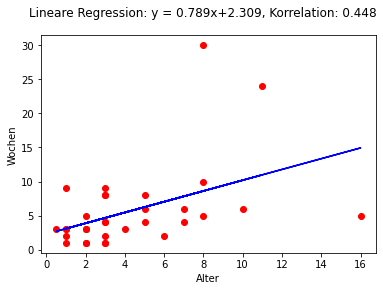

In [12]:
from charts import lr_plot

lr_plot(animal_table, "Alter", "Wochen")

Die Gerade in blau ist die Regressionsgerade. Dies ist die Gerade, die die Daten am besten beschreibt.

Oft wird die Funktionsgleichung der Geraden angegeben. Lineare Funktionen haben immer die Form $f(x) = m \cdot x + q$, dabei ist $m$ die Steigung und $q$ der $y$-Achsenabschnitt. Im Beispiel oben lautet die Steigung $m=0.789$ und der $y$-Achsenabschnitt $q=2.309$. 

Die Steigung von 0.789 kann so interpretiert werden, dass jedes zusätzliche Jahr eine Tiers die Wartedauer bis zur Adoption um 0.789 Wochen verlängert. 

Der $y$-Achsenabschnitt von 2.309 bedeutet, dass ein Baby-Tier, dessen Alter in der Nähe von 0 ist, gut 2 Wochen warten muss, bis es adoptiert wird.

Durch das Einsetzen eines Tieralters für $x$ kann nun eine Vorhersage für die Wartedauer bis zur Adoption vorhergesagt weren. 

Hier soll vorhergesagt werden, wie lange ein 5-jähriges Tier warten muss:

In [13]:
0.789*5+2.309

6.2540000000000004

Bei einem 5-jährigen Tier muss also mit einer Wartedauer von gut 6 Wochen gerechnet werden. Dabei wurde in die Funktionsgleichung $$f(x) = 0.789 \cdot x + 2.309$$ $x=5$ eingesetzt: $6.25=0.789 \cdot 5 + 2.309$. 

Der $y$-Wert von 6.25 entspricht genau dem $y$-Wert bei der Regressionsgeraden an der Stelle $x=5$.

<img src="../Images/11_predict.png" width=400>

Der $r$-Wert ist $r=+0.448$. Das Vorzeichen ist positiv, das heisst die Punktwolke und somit auch die Regressionsgerade, welche die Punktewolke bestmöglich beschreibt, steigen. Da $r \approx 0.5$ liegt eine moderate Korrelation vor. Dies stimmt mit der Tatsache überein, dass die Punkte im Streudiagramm weder besonders nah an der Regressionsgeraden sind noch irgendwie zufällig verteilt sind.

**Einzelarbeit:**

1. Wenn ein Tier 7 Jahre alt wäre. Wie lange müsste dieses nach unserer Vorhersage auf die Adoption warten?

In [14]:
#Lösung

0.789*7+2.309

#Das Tier müsste etw 7.8 Jahre auf die Adoption warten.

7.832000000000001

2. Erstellen Sie einen neuen lr_plot, bei welchem Sie das Gewicht als erklärende Variable und die Wochen als erklärte Variable verwenden.

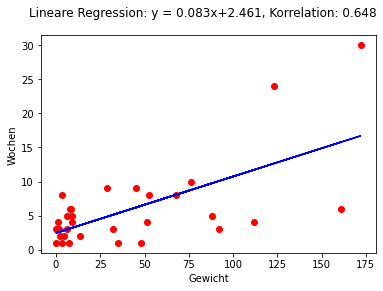

In [15]:
#Lösung

lr_plot(animal_table, "Gewicht", "Wochen")

3. Wenn ein Tier 21 Pfund wiegt, wie lange müsste es nach der obigen Vorhersage auf eine Adoption warten?

In [16]:
# Lösung

0.083*21+2.461

#Ca. 4.2 Wochen.

4.204

3. Wenn ein Tier 0.1 Pfund wiegt, wie lange müsste es nach der obigen Vorhersage auf eine Adoption warten?

In [17]:
# Lösung

0.083*0.1+2.461

#Ca. 2.5 Wochen (die entspricht etwa dem y-Achsenabschnitt).

2.4693

4. Wie viel länger muss ein Tier pro zusätzlichem Pfund Gewicht auf die Adoption warten?

*Etwa 0.083 Wochen (dies entspricht der Steigung $m$)*

5. Erstellen Sie einen lr_plot für "Alter" vs "Gewicht" allerdings nur für Katzen.

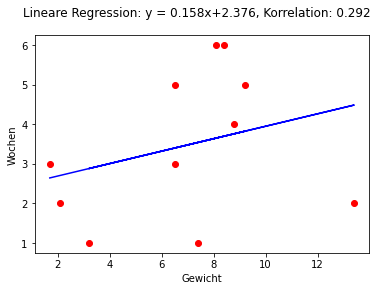

In [18]:
#Lösung

katzen = animal_table[animal_table.Spezies == "Katze"]
lr_plot(katzen, "Gewicht", "Wochen")

6. Wie interpretieren Sie die obige Darstellung? 

*Bei Katzen gibt es nur einen schwachen Zusammenhang zwischen dem Gewicht und den Anzahl Wochen. Es ist keine sinnvolle Voraussage möglich.*

7. Wählen Sie zwei weitere Variablen aus und zeichnen Sie den entsprechenden lr_plot. Interpretieren Sie diesen.

In [19]:
# Hier kommt Ihr Code hin.

**Wichtiger Hinweis:**
Ein linearer Prädiktor macht nur Sinn innerhalb des untersuchten Bereichs. So macht es wenig Sinn mit Hilfe einer linearen Regression bei einem Datensatz von Erwachsenen, welches die Grösse aus dem Gewicht zu vorhersagen versucht, das Gewicht von jemandem mit eine negativen Grösse oder einer Grösse von 5 Meter vorherzusagen.

Statistische Modelle sind wirklich nur Modelle aus einem beschränkten Datensatz. Sie können zwar innerhalb des untersuchten Bereichs nützliche Resultate generieren, darüber hinaus versprechen sie aber keine sinnvollen Vorhersagen zu liefern.  

## Streudiagramme mit Regressionsgerade interpretieren

Hier sei noch einmal die Darstellung Gewicht vs. Wochen gegeben.

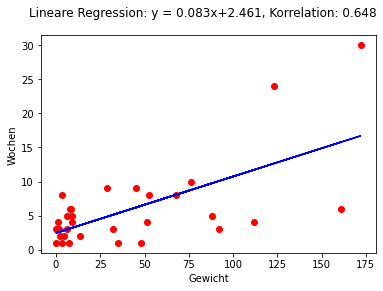

In [20]:
lr_plot(animal_table, "Gewicht", "Wochen")

Wie genau kann dies interpretiert werden? Was bedeutet es zum Beispiel wenn ein Punkt über der Geraden liegt? Was, wenn er unter der Geraden liegt?

**Einzelarbeit.** Gegeben sind jeweils eine Beschreibung, die Gleichung der Regressionsgeraden und der Korrelationskoeffizient.

1. *Beschreibung:* Pro Film, welcher im Marvel Universum (MCU) pro Jahr veröffentlich wird, soll die durchschnittlich konsumierte Zuckermenge pro Person vorhergesagt werden. <br><br>
*Regressionsgerade:* $f(x)=-3.19x+12$ <br><br>
*Korrelationskoeffizient:* $r=-0.05$

In [21]:
from fragen import frage11lra

frage11lra()

2. *Beschreibung:* Der Zusammenhang zwischen Schuhgrösse und Körpergrösse soll untersucht werden. <br><br>
*Regressionsgerade:* $f(x)=1.65x+54$ <br><br>
*Korrelationskoeffizient:* $r=0.89$

In [22]:
from fragen import frage11lrb

frage11lrb()

3. *Beschreibung:* Es soll ein Zusammenhang zwischen der Anzahl Uber-Fahrer in einer Stadt und der Anzahl Babys untersucht werden. <br><br>
*Regressionsgerade:* $f(x)=-15.3x+1150$ <br><br>
*Korrelationskoeffizient:* $r=-0.01$

In [23]:
from fragen import frage11lrc

frage11lrc()

4. *Beschreibung:* Betrachtet wird die Beziehung zwischen den verpassten Schulwochen und dem Notendurchschnitt an einem Gymnasium. <br><br>
*Regressionsgerade:* $f(x)=-0.26x+6.34$ <br><br>
*Korrelationskoeffizient:* $r=-0.61$

In [24]:
from fragen import frage11lrd

frage11lrd()

5. *Beschreibung:* Es gibt einen Zusammenhang zwischen der Anzahl Streaming-Videos, die jemand schaut, und dem Gewicht in kg. <br><br>
*Regressionsgerade:* $f(x)=1.6x+62$ <br><br>
*Korrelationskoeffizient:* $r=0.12$

Wie schwer ist - gemäss der Vorhersage - jemand, welche:r keine Streaming-Videos anschaut?

*62 kg*

Wie viel nimmt das Gewicht pro geschautem Video zu?

*1.6kg*

**Gruppenarbeit:** Hier soll wieder der Tierdatensatz untersucht werden. Dabei soll allerdings nur die Teilmenge der Hunde betrachtet werden.

In [25]:
hunde = animal_table[animal_table.Spezies == "Hund"]
hunde

,Spezies,Geschlecht,Alter,Steril,Beine,Gewicht,Wochen
Name,,,,,,,
Toggle,Hund,weiblich,3.0,True,4,48.0,1
Boo-boo,Hund,maennlich,11.0,True,4,123.0,24
Fritz,Hund,maennlich,4.0,True,4,92.0,3
Midnight,Hund,weiblich,5.0,False,4,112.0,4
Rex,Hund,maennlich,1.0,False,4,28.9,9
Gir,Hund,maennlich,8.0,False,4,88.0,5
Max,Hund,maennlich,3.0,False,4,52.8,8
Nori,Hund,weiblich,3.0,True,4,35.3,1
Mr. Peanutbutter,Hund,maennlich,10.0,False,4,161.0,6


1. Erstellen Sie einen lr_plot, welcher den Zusammenhang zwischen dem Alter und dem Gewicht (in Pfund) untersucht.

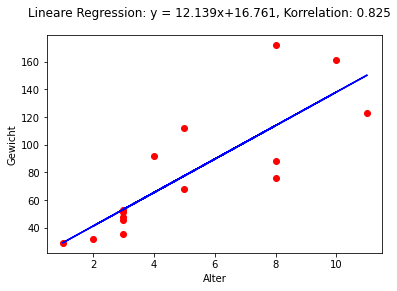

In [26]:
# Lösung

lr_plot(hunde, "Alter", "Gewicht")

2. Ist die Korrelation stark, moderat oder schwach?

*stark*

3. Ist die Korrelation positiv oder negativ?

*positiv*

4. Wie schwer ist - laut Modell - ein neugeborener Hund.

*ca. 16.8 Pfung ($y$-Achsenabschnitt $q$)*

5. Wie viele Pfund nimmt ein Hund gemäss Voraussage pro Jahr zu.

*ca. 12.1 Pfund (Steigung $m$)*

6. Machen Sie weitere ähnliche Untersuchungen beim Tierdatensatz.

In [27]:
#Hier kommt Ihr Code hin.

#Hier kommt Ihre Antwort hin.

## Lineare Regression bei Ihrem Datensatz

*Einzelarbeit:* Betrachten Sie nun Ihren Datensatz. 
1. Wie lautet der Name Ihres Datensatzes?

#Hier kommt der Name Ihres Datensatzes hin.

2. Wählen Sie zwei Variablen aus, die Sie schon im Kapitel "Regression" untersucht haben.

#Ihre beiden Variablen.

3. Zeichnen Sie den lr_plot.

In [28]:
#Hier kommt Ihr Code hin.

4. Ist die Korrelation stark, moderat oder schwach?

#Hier kommt Ihre Antwort hin.

5. Welche Zunahme in $y$-Richtung hat die Zunahme einer Einheit in $x$-Richtung gemäss Ihrem Modell zur Folge?

#Hier kommt Ihre Antwort hin.

6. Untersuchen Sie einen zweiten Zusammenhang wie in den Aufgaben 2 bis 5.

#Hier kommt Ihre Antwort hin.

**Zusatzaufgabe:** Beeinfluss die Anzahl Kaffetassen, die jemand pro Tag trinkt, die Schlafmenge? 
17 Leute wurden zu Ihrem Kaffeekonsum und Ihren Schlafgewohnheiten befragt:


In [38]:
data = {"Anzahl Kaffeetassen pro Tag": [3,0,8,1,1,2,1,0,2,1,3,4,0,5,1,2,1],
        "Schlaf in Minuten": [400,480,310,300,390,360,410,500,390,480,360,430,450,240,420,380,480]}
        
coffee_table = pd.DataFrame(data)

coffee_table

,Anzahl Kaffeetassen pro Tag,Schlaf in Minuten
0,3,400
1,0,480
2,8,310
3,1,300
4,1,390
5,2,360
6,1,410
7,0,500
8,2,390
9,1,480


Beschreiben Sie den Zusammenhang zwischen Kaffeekonsum und Schlafverhalten anhand des obigen Datensatzes.

*Die Korrelation ist moderat und negativ. Pro Kaffeetasse nimmt der Schlaf um ca. 22 Minuten ab. Wer keinen Kaffee trinkt, schläft ungefähr 445 Minuten (7.4 Stunden).*

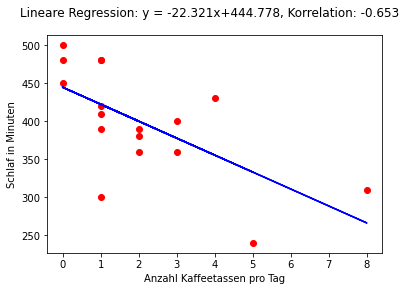

In [39]:
# Mögliche Lösung
lr_plot(coffee_table, "Anzahl Kaffeetassen pro Tag", "Schlaf in Minuten")

**Zusatzaufgabe:** Sammeln Sie Daten bei Ihren Sitznachbarn zu einem Thema das Sie interessiert. Beschreiben Sie die entsprechende Beziehung.

In [31]:
# Hier kommt Ihr Code hin.

#Hier kommt Ihre Beschreibung hin.